In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)


In [5]:
df = pd.read_csv('data/cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [10]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(21573, 10) (5394, 10)


In [11]:
counts_tr = pd.Series({ft: [train[ft].value_counts().round(3).iloc[:10].to_dict()] for ft in train.columns}, name='top10_counts_train')
counts_te = pd.Series({ft: [test[ft].value_counts().round(3).iloc[:10].to_dict()] for ft in test.columns}, name='top_10_counts_test')
min_max = train.describe().T[['min', 'max']].add_suffix('_train').join(test.describe().T[['min', 'max']].add_suffix('_test'))
stats_pivot = pd.concat([min_max, counts_tr, counts_te], axis=1)
stats_pivot

,min_train,max_train,min_test,max_test,top10_counts_train,top_10_counts_test
carat,0.2,4.50,0.20,4.00,"[{0.3: 1043, 1.01: 914, 0.31: 891, 0.7: 786, 0.32: 749, 0.9: 610, 1.0: 603, 0.41: 545, 0.4: 528, 0.5: 511}]","[{0.3: 288, 0.31: 227, 0.32: 201, 1.01: 197, 0.7: 173, 0.41: 165, 0.9: 154, 0.71: 141, 1.0: 129, 0.5: 124}]"
depth,50.8,73.60,52.20,72.20,"[{62.0: 906, 61.9: 866, 62.1: 806, 61.8: 804, 62.2: 784, 61.6: 766, 62.3: 757, 61.7: 743, 61.5: 672, 62.4: 670}]","[{61.9: 225, 62.0: 225, 62.1: 210, 61.8: 208, 62.2: 193, 62.4: 192, 61.6: 189, 61.7: 180, 62.3: 178, 61.4: 165}]"
table,49.0,79.00,49.00,68.00,"[{56.0: 3986, 57.0: 3847, 58.0: 3389, 59.0: 2636, 55.0: 2513, 60.0: 1659, 54.0: 1038, 61.0: 914, 62.0: 509, 53.0: 225}]","[{56.0: 1002, 57.0: 934, 58.0: 869, 59.0: 666, 55.0: 623, 60.0: 416, 54.0: 263, 61.0: 234, 62.0: 112, 63.0: 64}]"
x,0.0,10.23,3.77,10.01,"[{4.38: 197, 4.34: 183, 4.32: 180, 4.33: 178, 4.37: 169, 4.4: 165, 4.41: 161, 4.35: 157, 4.42: 155, 4.3: 154}]","[{4.37: 60, 4.32: 48, 4.35: 47, 4.41: 47, 4.33: 47, 4.39: 46, 4.31: 44, 4.34: 41, 4.3: 40, 4.42: 39}]"
y,0.0,10.16,3.72,58.90,"[{4.38: 188, 4.35: 183, 4.34: 177, 4.37: 169, 4.41: 167, 4.4: 164, 4.39: 163, 4.31: 162, 4.36: 161, 4.33: 149}]","[{4.37: 54, 4.35: 54, 4.33: 52, 4.31: 50, 4.39: 49, 4.34: 46, 4.45: 46, 4.38: 46, 4.42: 43, 4.43: 38}]"
z,0.0,6.72,0.00,31.80,"[{2.7: 319, 2.69: 305, 2.68: 297, 2.72: 285, 2.71: 284, 2.73: 266, 2.67: 253, 4.01: 228, 4.02: 223, 2.66: 223}]","[{2.69: 90, 2.71: 84, 2.68: 76, 2.7: 75, 2.72: 67, 2.73: 61, 2.67: 60, 3.99: 60, 2.74: 59, 2.65: 53}]"
price,326.0,18818.00,326.00,18795.00,"[{625: 60, 544: 59, 802: 57, 828: 56, 605: 49, 776: 47, 789: 47, 552: 47, 666: 45, 863: 44}]","[{776: 19, 544: 15, 552: 15, 789: 15, 605: 15, 1013: 14, 526: 14, 698: 14, 561: 14, 720: 13}]"
cut,NaN,NaN,NaN,NaN,"[{'Ideal': 8638, 'Premium': 5516, 'Very Good': 4832, 'Good': 1958, 'Fair': 629}]","[{'Ideal': 2178, 'Premium': 1383, 'Very Good': 1198, 'Good': 483, 'Fair': 152}]"
color,NaN,NaN,NaN,NaN,"[{'G': 4536, 'E': 3916, 'F': 3846, 'H': 3242, 'D': 2665, 'I': 2190, 'J': 1178}]","[{'G': 1125, 'E': 1001, 'F': 883, 'H': 860, 'D': 679, 'I': 581, 'J': 265}]"
clarity,NaN,NaN,NaN,NaN,"[{'SI1': 5250, 'VS2': 4908, 'SI2': 3675, 'VS1': 3261, 'VVS2': 2032, 'VVS1': 1439, 'IF': 728, 'I1': 280}]","[{'SI1': 1321, 'VS2': 1191, 'SI2': 900, 'VS1': 832, 'VVS2': 499, 'VVS1': 400, 'IF': 166, 'I1': 85}]"


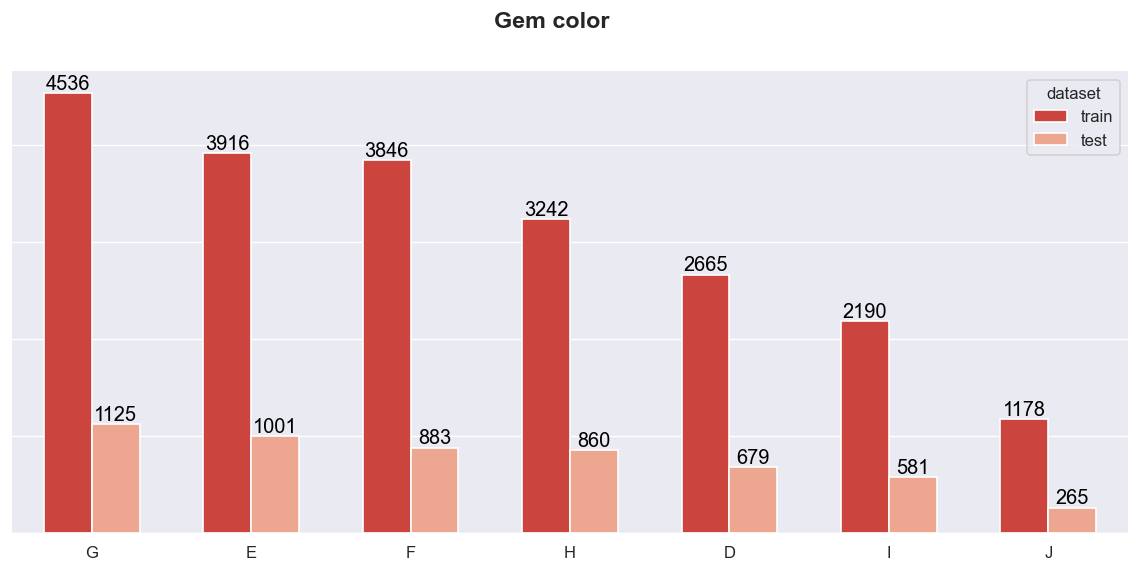

In [12]:
train['dataset'] = 'train'
test['dataset'] = 'test'
train_test = pd.concat([train, test])

catergory = 'color' # 'color', 'clarity', 'cut'
fig = plt.figure(figsize=(12, 5), dpi=120)
s = sns.countplot(data=train_test, x=catergory, order=train_test[catergory].value_counts().index, hue='dataset', palette='Reds_r', width=0.6)
fig.suptitle(f'Gem {catergory}', ha='center',  fontweight='bold', fontsize=14)
for container in s.containers:
    s.bar_label(container, c='black', size=12);
    s.set_ylabel(''); s.spines['top'].set_visible(False), 
    s.set_xlabel(''); s.spines['right'].set_visible(False),
    s.spines['left'].set_visible(False)
    plt.tick_params(labelleft=False)
    plt.savefig('data/count_cuts.png'); 

train.drop(columns='dataset', inplace=True)
test.drop(columns='dataset', inplace=True)

In [13]:
pd.crosstab(train.color, train.clarity).style.background_gradient(cmap='YlOrRd')

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,21,35,842,547,281,622,97,220
E,42,69,985,683,494,978,256,409
F,48,150,879,611,549,912,288,409
G,51,271,815,625,874,966,386,548
H,60,125,847,637,469,629,229,246
I,38,58,559,366,378,491,153,147
J,20,20,323,206,216,310,30,53


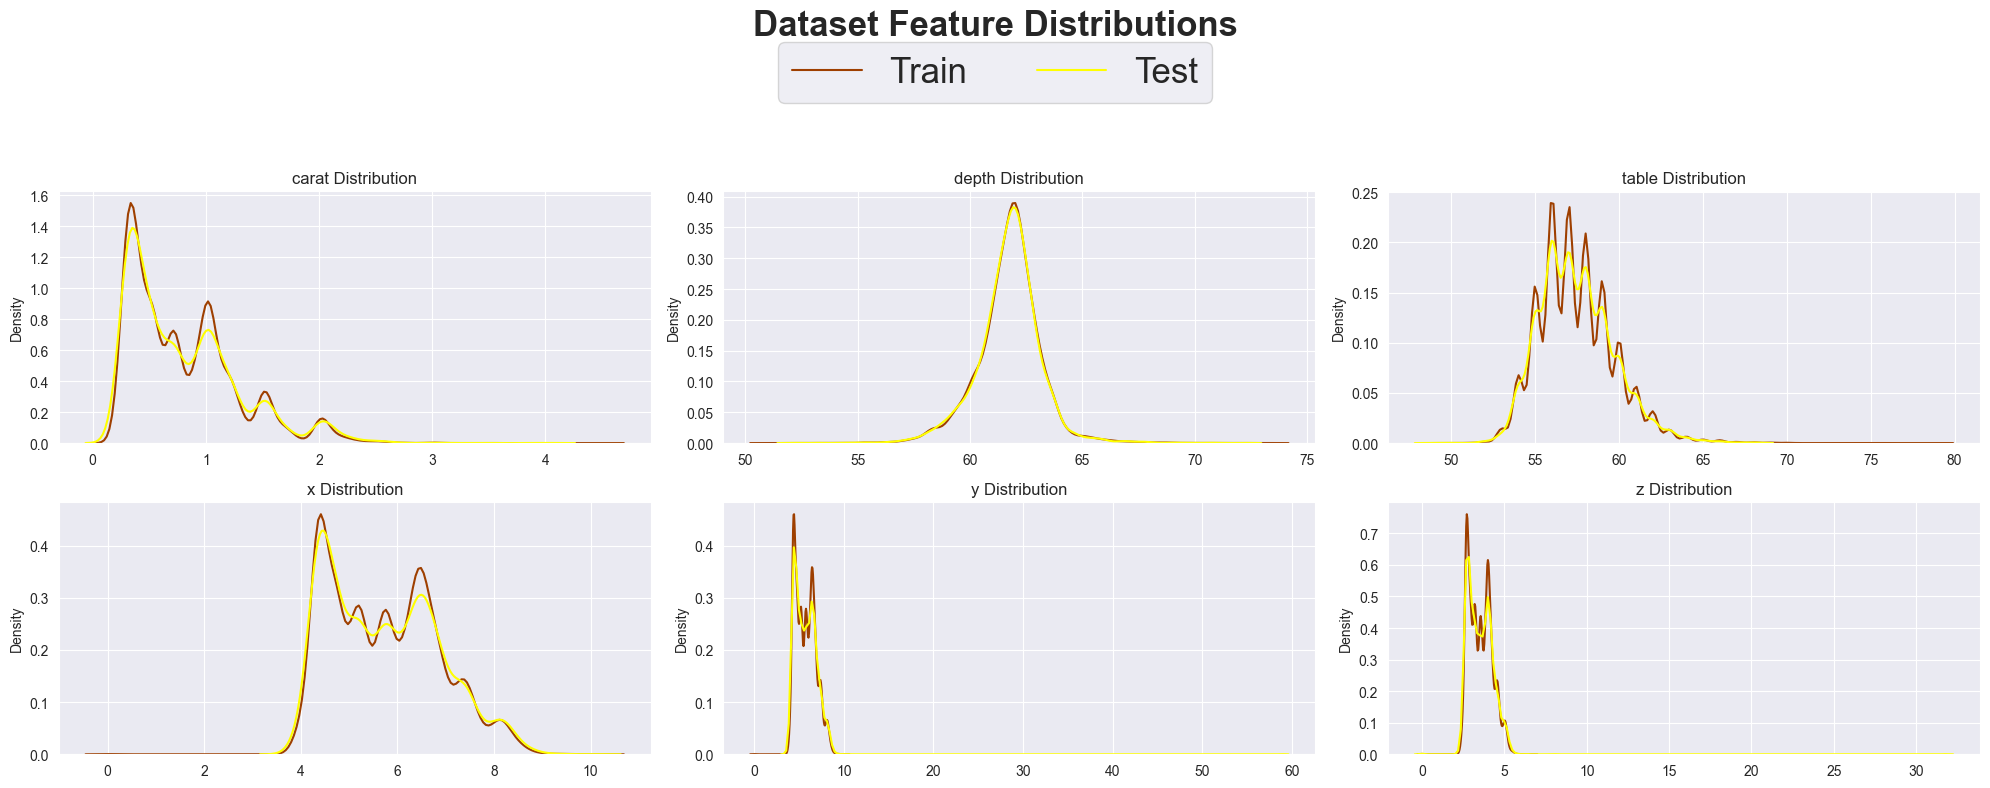

In [14]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 3
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label='Train',
        ax=ax[i], color='#9E3F00'
    )
    
    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color='yellow'
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
    
fig.suptitle(f'Dataset Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()